In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train = pd.read_csv("C:/Users/HP/Desktop/pandas/sfcrime/train.csv")
test = pd.read_csv("C:/Users/HP/Desktop/pandas/sfcrime/test.csv")
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,5/10/2015 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,5/10/2015 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,5/10/2015 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,5/10/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,5/10/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [4]:
train.shape

(878049, 9)

In [5]:
train.duplicated().sum()

2323

In [6]:
train.drop_duplicates(keep='first', inplace=True)

In [7]:
des = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address','X','Y']
train[des].describe()

,X,Y
count,875726.000000,875726.000000
mean,-122.422623,37.771032
std,0.030363,0.457497
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416446,37.775421
75%,-122.406959,37.784380
max,-120.500000,90.000000


In [8]:
train['PdDistrict'].value_counts()

SOUTHERN      156528
MISSION       119723
NORTHERN      105105
BAYVIEW        89098
CENTRAL        85267
TENDERLOIN     81642
INGLESIDE      78722
TARAVAL        65400
PARK           49161
RICHMOND       45080
Name: PdDistrict, dtype: int64

<AxesSubplot:ylabel='PdDistrict'>

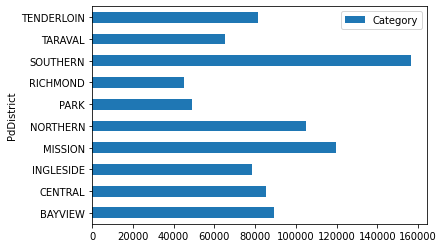

In [9]:
train.groupby(['PdDistrict']).agg({'Category':'count'}).plot(kind='barh')

In [10]:
train.groupby(['PdDistrict','Category']).\
agg({'Resolution':'count'}).\
pivot_table(index='Category',columns='PdDistrict')['Resolution']

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ARSON,393.0,111.0,182.0,144.0,149.0,65.0,103.0,185.0,120.0,60.0
ASSAULT,9845.0,6971.0,8522.0,11146.0,8312.0,3512.0,3198.0,12175.0,5460.0,7674.0
BAD CHECKS,34.0,65.0,32.0,46.0,54.0,15.0,31.0,74.0,36.0,19.0
BRIBERY,56.0,12.0,53.0,66.0,18.0,7.0,8.0,37.0,17.0,15.0
BURGLARY,3914.0,4499.0,3327.0,3736.0,5827.0,2875.0,2683.0,4796.0,3459.0,1484.0
DISORDERLY CONDUCT,218.0,494.0,171.0,1097.0,450.0,270.0,108.0,510.0,162.0,833.0
DRIVING UNDER THE INFLUENCE,179.0,160.0,206.0,357.0,260.0,176.0,319.0,306.0,202.0,103.0
DRUG/NARCOTIC,4496.0,1805.0,2372.0,8750.0,4508.0,2570.0,999.0,9222.0,1529.0,17668.0
DRUNKENNESS,243.0,517.0,190.0,782.0,368.0,373.0,148.0,959.0,258.0,439.0


<AxesSubplot:ylabel='Category'>

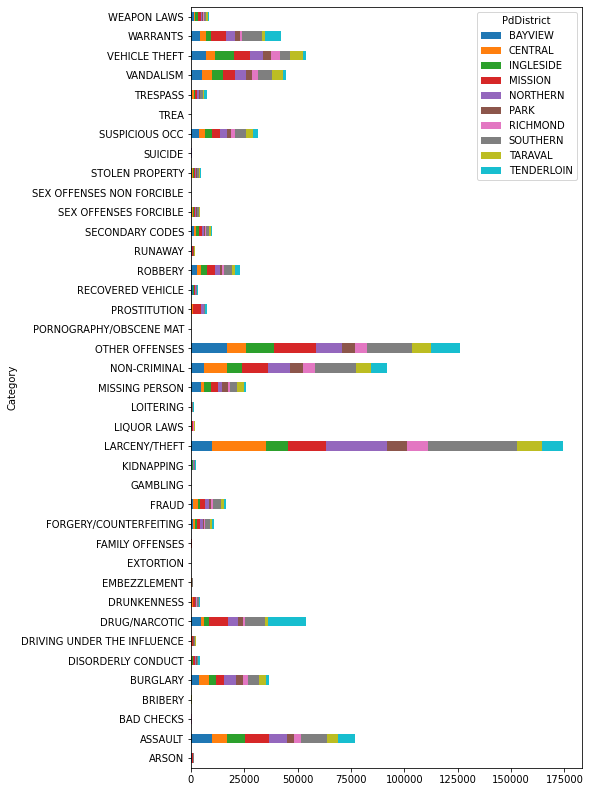

In [11]:
train.groupby(['PdDistrict','Category']).\
agg({'Resolution':'count'}).\
pivot_table(index='Category',columns='PdDistrict')['Resolution'].plot(kind='barh',stacked=True,figsize=(7,14))

In [12]:
train.drop('Descript', axis=1, inplace=True)
train.drop('Resolution', axis=1, inplace=True)

In [13]:

train['Dates']=pd.to_datetime(train['Dates'])
pre = preprocessing.LabelEncoder()
crime = pre.fit_transform(train.Category)
predict = crime
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour)
train.drop('Dates', axis=1, inplace=True)

train_new = pd.concat([days, district], axis=1)


train_new.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


<Figure size 2160x2160 with 0 Axes>

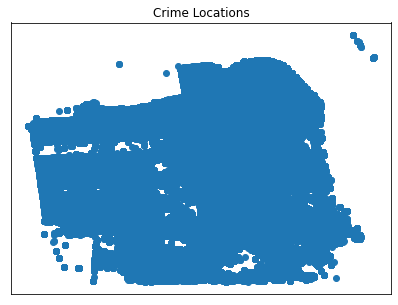

In [19]:
plt.figure(figsize=(30,30))

longitudes=train['X']
latitudes=train['Y']
subset=500000
latitudes=latitudes[0:subset]
longitudes=longitudes[0:subset]
plt.figure(figsize=(15,5))
axis_label_font = {'size':'20', 'color':'#165880'}
axis_tic_font = {'size':'20', 'color':'#165880'}
plt.xlabel("Latitude",axis_label_font)
plt.ylabel("Longitude",axis_tic_font)
plt.xticks(np.arange(-122.4, -122.6))
plt.yticks(np.arange(37.46, 37.85))
plt.subplot(1,2,1)
plt.scatter(longitudes, latitudes)
plt.title("Crime Locations")
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:

test['Dates']=pd.to_datetime(test['Dates'])
days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)
hour = test.Dates.dt.hour
hour = pd.get_dummies(hour)




In [21]:
test.drop('Dates',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
test = pd.concat([days, district], axis=1)

In [22]:
train_new.info

<bound method DataFrame.info of         Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0            0       0         0       0         0        0          1   
1            0       0         0       0         0        0          1   
2            0       0         0       0         0        0          1   
3            0       0         0       0         0        0          1   
4            0       0         0       0         0        0          1   
...        ...     ...       ...     ...       ...      ...        ...   
878044       0       1         0       0         0        0          0   
878045       0       1         0       0         0        0          0   
878046       0       1         0       0         0        0          0   
878047       0       1         0       0         0        0          0   
878048       0       1         0       0         0        0          0   

        BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
0    

In [23]:
test.info

<bound method DataFrame.info of         Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0            0       0         0       1         0        0          0   
1            0       0         0       1         0        0          0   
2            0       0         0       1         0        0          0   
3            0       0         0       1         0        0          0   
4            0       0         0       1         0        0          0   
...        ...     ...       ...     ...       ...      ...        ...   
884257       0       0         0       0         0        0          1   
884258       0       0         0       0         0        0          1   
884259       0       0         0       0         0        0          1   
884260       0       0         0       0         0        0          1   
884261       0       0         0       0         0        0          1   

        BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
0    

In [24]:

X_train, X_test, y_train, y_test = train_test_split(train_new, predict, test_size = 0.25, random_state = 4)


In [25]:

df = RandomForestClassifier(random_state=0, max_depth=5, n_jobs=-1)
df.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [26]:

df = RandomForestClassifier(random_state=0, max_depth=5, n_jobs=-1)
df.fit(train_new,predict)


RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [27]:
final = df.predict_proba(test)


In [28]:
csv=pd.read_csv('C:/Users/HP/Desktop/pandas/sfcrime/sampleSubmission.csv')

In [29]:
csv.iloc[:,1:] = final
csv

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.003785,0.105167,0.000327,0.000576,0.042293,0.003287,0.002791,0.050801,0.004022,...,0.000184,0.004703,0.000482,0.041588,0.000015,0.007150,0.059335,0.077593,0.047304,0.014875
1,1,0.003785,0.105167,0.000327,0.000576,0.042293,0.003287,0.002791,0.050801,0.004022,...,0.000184,0.004703,0.000482,0.041588,0.000015,0.007150,0.059335,0.077593,0.047304,0.014875
2,2,0.001538,0.087454,0.000410,0.000247,0.048549,0.004306,0.003085,0.044827,0.005049,...,0.000134,0.005659,0.000636,0.033817,0.000004,0.007469,0.055408,0.064259,0.043604,0.008365
3,3,0.002104,0.107676,0.000326,0.000507,0.039361,0.003465,0.003139,0.038647,0.003870,...,0.000209,0.004680,0.000713,0.037947,0.000002,0.006072,0.062762,0.099143,0.037373,0.012401
4,4,0.002104,0.107676,0.000326,0.000507,0.039361,0.003465,0.003139,0.038647,0.003870,...,0.000209,0.004680,0.000713,0.037947,0.000002,0.006072,0.062762,0.099143,0.037373,0.012401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.001463,0.087446,0.000460,0.000386,0.038158,0.006879,0.002722,0.065602,0.005470,...,0.000224,0.005237,0.000604,0.034645,0.000006,0.008063,0.047767,0.061931,0.051230,0.010168
884258,884258,0.001550,0.081992,0.000596,0.000266,0.049437,0.004697,0.002571,0.049489,0.004170,...,0.000137,0.005754,0.000601,0.034517,0.000005,0.007577,0.051776,0.063302,0.045024,0.008198
884259,884259,0.001969,0.096813,0.000425,0.000534,0.044043,0.003167,0.002443,0.042024,0.003227,...,0.000226,0.004614,0.000742,0.039136,0.000002,0.006288,0.060512,0.092877,0.038564,0.012604
884260,884260,0.003272,0.099506,0.000473,0.000481,0.043575,0.003099,0.001955,0.054731,0.003102,...,0.000245,0.004917,0.000403,0.040703,0.000014,0.007712,0.055248,0.074873,0.049469,0.015414


In [31]:

first_column = csv.columns[0]
csv = csv.drop([first_column], axis=1)
csv.to_csv('submission.csv', index=False)